In [1]:
# import libraries
import pandas as pd
import numpy as np

# scikit library for linear regression
import statsmodels.api as sm
from statsmodels.formula.api import ols # for anova test

from sklearn.model_selection import train_test_split, KFold

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import pylab

from sklearn.metrics import mean_squared_error

In [2]:
## read the data

path = "C:/Users/HP/Desktop/All program files/laptops.csv"
data=pd.read_csv(path,encoding='unicode_escape')

In [3]:
print(data.head())
data.tail()
data.shape
data.info()

   Unnamed: 0 Company      Product   TypeName  Inches  \
0           1   Apple  MacBook Pro  Ultrabook    13.3   
1           2   Apple  Macbook Air  Ultrabook    13.3   
2           3      HP       250 G6   Notebook    15.6   
3           4   Apple  MacBook Pro  Ultrabook    15.4   
4           5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.3

In [4]:
#Drop Column  "Unnamed: 0" and "Product" as it has index whic is not required.
data.drop(columns = ["Unnamed: 0"],inplace = True)
data.drop(columns = ["Product"],inplace = True)

In [5]:
# check data types
data.dtypes 

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [6]:
#Check for Singualirity

for c in data:
    print(c," = ",data[c].value_counts())

Company  =  Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64
TypeName  =  Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64
Inches  =  15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64
ScreenResolution  =  Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS P

# EDA

In [7]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [8]:
#Check For Nulls
data.isnull().sum()  #No Null Present

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

F:\Anaconda\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

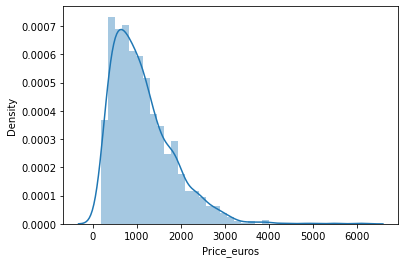

In [9]:
#Check for the Distribution of the Price Column

sns.distplot(data['Price_euros'])

<AxesSubplot:>

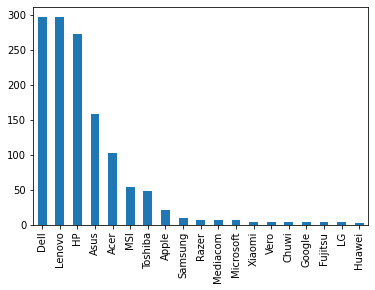

In [10]:
#Company

data["Company"].value_counts().plot(kind = "bar")

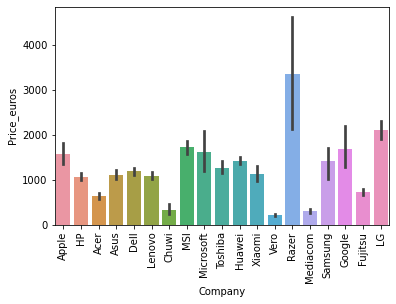

In [11]:
#Price Vs Company

sns.barplot(x=data['Company'],y=data['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

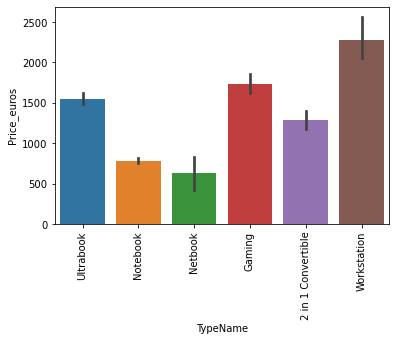

In [12]:
#TypeName
data.TypeName.value_counts()
sns.barplot(x=data["TypeName"],y=data["Price_euros"])
plt.xticks(rotation = "vertical")
plt.show()

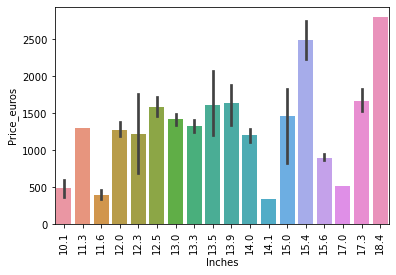

In [13]:
#Inches
data.Inches.value_counts()
sns.barplot(x=data["Inches"],y=data["Price_euros"])
plt.xticks(rotation = "vertical")
plt.show()

In [14]:
#ScreenResolution
data.ScreenResolution.value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

<AxesSubplot:>

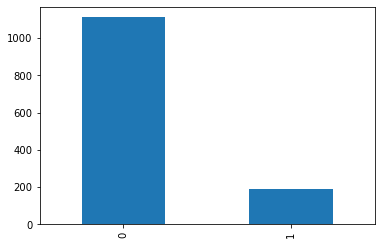

In [15]:
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
data['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price_euros'>

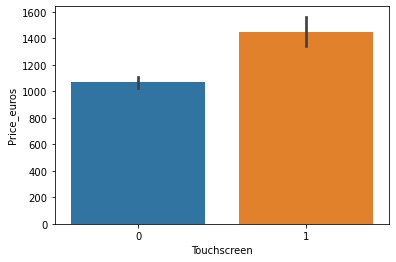

In [16]:
sns.barplot(x=data['Touchscreen'],y=data['Price_euros'])

<AxesSubplot:>

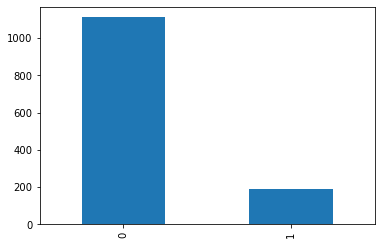

In [17]:
data['IPS'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
data['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='IPS', ylabel='Price_euros'>

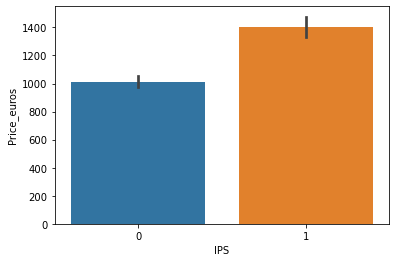

In [18]:
sns.barplot(x=data['IPS'],y=data['Price_euros'])

In [19]:
#ScreenResolution

new = data['ScreenResolution'].str.split('x',n=1,expand=True)
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [20]:
data['X_res'] = new[0]
data['Y_res'] = new[1]

In [21]:
data['X_res'] = data['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [22]:
data["X_res"] = data["X_res"].astype(float)
data["Y_res"] = data["Y_res"].astype(float)

In [23]:
data.corr()['Price_euros']

Inches         0.068197
Price_euros    1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price_euros, dtype: float64

In [24]:
data.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
Touchscreen           int64
IPS                   int64
X_res               float64
Y_res               float64
dtype: object

In [25]:
#PPI = (root(Width^2*height^2)/Screen Size)

data['PPI'] = (((data['X_res']**2) + (data['Y_res']**2))**0.5/data['Inches']).astype('float')

In [26]:
data.corr()['Price_euros'] # as we can see PPI has good correlation with Price so will keep PPI column

Inches         0.068197
Price_euros    1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price_euros, dtype: float64

In [27]:
#Drop Columns = "X_res","Y_res","Inches"

data.drop(columns = ["X_res","Y_res","Inches"],inplace =True)

In [28]:
data.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,226.983005
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,127.677940
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,141.211998
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,220.534624
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,226.983005


In [29]:
#Drop Column "ScreenResolution"
data.drop(columns = "ScreenResolution",inplace = True)

In [30]:
#CPU
data['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [31]:
data['CPU'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [32]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [33]:
data['CPU brand'] = data['CPU'].apply(fetch_processor)

In [34]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,CPU,CPU brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,226.983005,Intel Core i5,Intel Core i5


<AxesSubplot:>

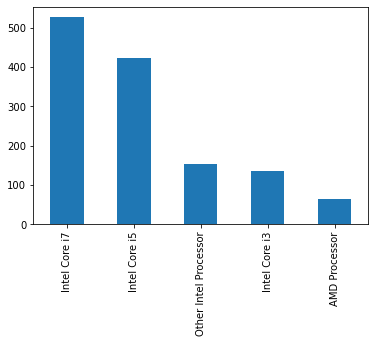

In [35]:
data["CPU brand"].value_counts().plot(kind = "bar")

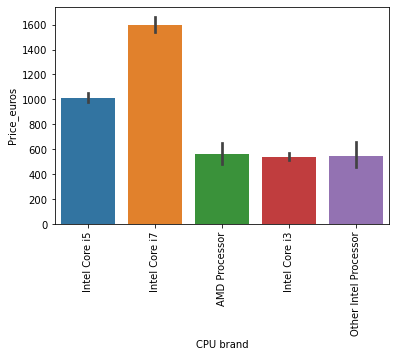

In [36]:
sns.barplot(x=data['CPU brand'],y=data['Price_euros'])
plt.xticks(rotation = "vertical")
plt.show()

In [37]:
data.drop(columns = "CPU",inplace=True)
data.drop(columns = "Cpu",inplace=True)

In [38]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,CPU brand
0,Apple,Ultrabook,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,0,127.677940,Intel Core i5
2,HP,Notebook,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,226.983005,Intel Core i5


<AxesSubplot:>

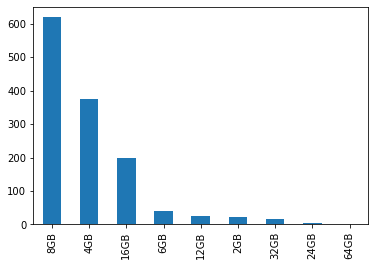

In [39]:
#Ram
data.Ram.value_counts().plot(kind = "bar")

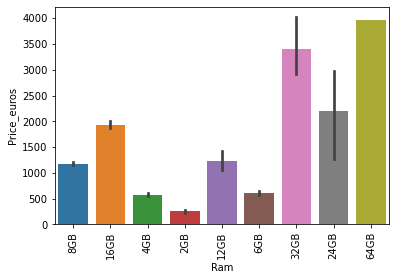

In [40]:
##Ram Vs Price
sns.barplot(x=data['Ram'],y=data['Price_euros'])
plt.xticks(rotation = "vertical")
plt.show()

In [41]:
data['Ram'] = data['Ram'].str.replace('GB','')

In [42]:
#Weight
data.Weight.value_counts()
data['Weight'] = data['Weight'].str.replace('kg','')

In [43]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,CPU brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


In [44]:
#Memory
data.Memory.value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [45]:
data["Memory"].str.split()

0                  [128GB, SSD]
1       [128GB, Flash, Storage]
2                  [256GB, SSD]
3                  [512GB, SSD]
4                  [256GB, SSD]
                 ...           
1298               [128GB, SSD]
1299               [512GB, SSD]
1300     [64GB, Flash, Storage]
1301                 [1TB, HDD]
1302               [500GB, HDD]
Name: Memory, Length: 1303, dtype: object

In [46]:
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)

In [47]:
data["Memory"] = data["Memory"].str.replace('GB', '')


In [48]:
data.Memory

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301              1TB HDD
1302              500 HDD
Name: Memory, Length: 1303, dtype: object

In [49]:
data["Memory"] = data["Memory"].str.replace('TB', '000')


In [50]:
data.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,CPU brand
459,HP,Notebook,8,256 SSD,Intel HD Graphics 520,Windows 10,2.5,639.90,0,0,106.113062,Intel Core i3
159,Toshiba,Notebook,4,500 HDD,Intel HD Graphics 520,Windows 10,2.1,447.00,0,0,100.454670,Intel Core i3
679,Acer,Gaming,16,256 SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.5,1299.00,0,0,141.211998,Intel Core i5
774,HP,Ultrabook,4,256 SSD,Intel HD Graphics 520,Windows 10,1.26,1244.00,0,0,125.367428,Intel Core i5
1180,Lenovo,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 520,Windows 10,1.36,1637.00,1,1,209.800683,Intel Core i5
269,Lenovo,Notebook,8,256 SSD,Intel UHD Graphics 620,Windows 10,2.05,880.00,0,0,141.211998,Intel Core i7
985,Dell,Notebook,4,500 HDD,AMD Radeon R5 M430,Windows 10,2.25,599.00,0,0,100.454670,Intel Core i5
1045,HP,Notebook,8,256 SSD + 500 HDD,Intel HD Graphics 520,Windows 10,1.84,2103.34,0,0,141.211998,Intel Core i5
1120,Vero,Notebook,4,32 Flash Storage,Intel HD Graphics 400,Windows 10,1.35,196.00,0,0,165.632118,Other Intel Processor
111,Dell,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 640,Windows 10,1.23,1379.00,1,0,276.053530,Intel Core i7


In [51]:
new = data["Memory"].str.split("+", n = 1, expand = True)

In [52]:
new

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [53]:
data["first"]= new[0]

In [54]:
data["first"]=data["first"].str.strip()

In [55]:
data["second"]= new[1]

In [56]:
data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [57]:
data

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,CPU brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,128 SSD,None,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,128 Flash Storage,None,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,256 SSD,None,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,512 SSD,None,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,256 SSD,None,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.8,638.00,1,1,157.350512,Intel Core i7,128 SSD,None,0,1,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.3,1499.00,1,1,276.053530,Intel Core i7,512 SSD,None,0,1,0,0
1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.5,229.00,0,0,111.935204,Other Intel Processor,64 Flash Storage,None,0,0,0,1
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,0,0,100.454670,Intel Core i7,1000 HDD,None,1,0,0,0


In [58]:
data['first'] = data['first'].str.replace(r'\D', '')

data["second"].fillna("0", inplace = True)

C:\Users\HP\AppData\Local\Temp/ipykernel_3816/2162945260.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['first'] = data['first'].str.replace(r'\D', '')


In [59]:
data

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,CPU brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,128,0,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,128,0,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,256,0,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,512,0,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,256,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.8,638.00,1,1,157.350512,Intel Core i7,128,0,0,1,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.3,1499.00,1,1,276.053530,Intel Core i7,512,0,0,1,0,0
1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.5,229.00,0,0,111.935204,Other Intel Processor,64,0,0,0,0,1
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,0,0,100.454670,Intel Core i7,1000,0,1,0,0,0


In [60]:
data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [61]:
data['second'] = data['second'].str.replace(r'\D', '')

data["first"] = data["first"].astype(int)
data["second"] = data["second"].astype(int)


C:\Users\HP\AppData\Local\Temp/ipykernel_3816/2280998353.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['second'] = data['second'].str.replace(r'\D', '')


In [62]:
data["HDD"]=(data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data["first"]*data["Layer1Flash_Storage"]+data["second"]*data["Layer2Flash_Storage"])

data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [63]:
data.drop(columns = "Memory",inplace = True)

In [64]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,CPU brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,0,0


In [65]:
data.corr()['Price_euros']

Price_euros      1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price_euros, dtype: float64

In [66]:
#Feature Hybrid and Flash Storage showing nigligible correlation with Price we will drop those feature

data.drop(columns = ["Hybrid","Flash_Storage"],inplace = True)

In [67]:
#Gpu

data.Gpu.value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [68]:
data['Gpu brand'] = data['Gpu'].apply(lambda x:x.split()[0])

In [69]:
data['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [70]:
data = data[data['Gpu brand'] != 'ARM']

In [71]:
data['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

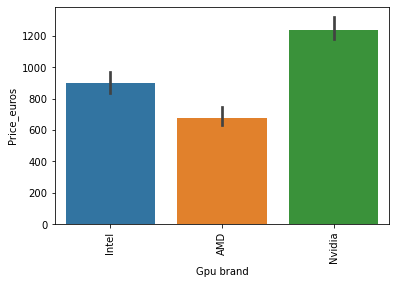

In [72]:
sns.barplot(x=data['Gpu brand'],y=data['Price_euros'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [73]:
data.drop(columns=['Gpu'],inplace=True)

F:\Anaconda\envs\Tensorflow\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [74]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,IPS,PPI,CPU brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel


In [75]:
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [76]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [77]:
data['os'] = data['OpSys'].apply(cat_os)

C:\Users\HP\AppData\Local\Temp/ipykernel_3816/2534197965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['os'] = data['OpSys'].apply(cat_os)


In [78]:
data.drop(columns = "OpSys",inplace = True)

F:\Anaconda\envs\Tensorflow\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [79]:
data.head()

,Company,TypeName,Ram,Weight,Price_euros,Touchscreen,IPS,PPI,CPU brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


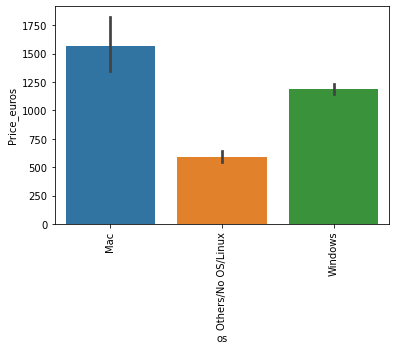

In [80]:
sns.barplot(x=data['os'],y=data['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

F:\Anaconda\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

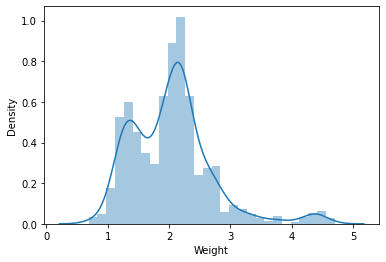

In [81]:
sns.distplot(data['Weight'])

In [82]:
data.corr()['Price_euros']

Price_euros    1.000000
Touchscreen    0.192917
IPS            0.253320
PPI            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price_euros, dtype: float64

In [83]:
data['Ram'] = data['Ram'].astype('int32')
data['Weight'] = data['Weight'].astype('float32')

C:\Users\HP\AppData\Local\Temp/ipykernel_3816/1191241714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Ram'] = data['Ram'].astype('int32')
C:\Users\HP\AppData\Local\Temp/ipykernel_3816/1191241714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Weight'] = data['Weight'].astype('float32')


In [84]:
data.dtypes

Company         object
TypeName        object
Ram              int32
Weight         float32
Price_euros    float64
Touchscreen      int64
IPS              int64
PPI            float64
CPU brand       object
HDD              int64
SSD              int64
Gpu brand       object
os              object
dtype: object

In [85]:
# function to plot the histogram, correlation matrix, boxplot based on the chart-type
def plotdata(data,nc,ctype):
    if ctype not in ['h','c','b']:
        msg='Invalid Chart Type specified'
        return(msg)
    
    if ctype=='c':
        cor = data[nc].corr()
        cor = np.tril(cor)
        sns.heatmap(cor,vmin=-1,vmax=1,xticklabels=nc,
                    yticklabels=nc,square=False,annot=True,linewidths=1)
    else:
        COLS = 2
        ROWS = int(np.ceil(len(nc)/COLS))
        POS = 1
        
        fig = plt.figure() # outer plot
        for c in nc:
            fig.add_subplot(ROWS,COLS,POS)
            if ctype=='b':
                sns.boxplot(data[c],color='yellow')
            else:
                sns.distplot(data[c],bins=20,color='green')
            
            POS+=1
    return(1)

In [86]:
### Function to split columns into NC and FC
def splitcols(data):
    nc=data.select_dtypes(exclude='object').columns.values
    fc=data.select_dtypes(include='object').columns.values
    return(nc,fc)

In [87]:
#Spliting Columns
nc,fc = splitcols(data)
print(nc)
print(fc)

['Ram' 'Weight' 'Price_euros' 'Touchscreen' 'IPS' 'PPI' 'HDD' 'SSD']
['Company' 'TypeName' 'CPU brand' 'Gpu brand' 'os']


1

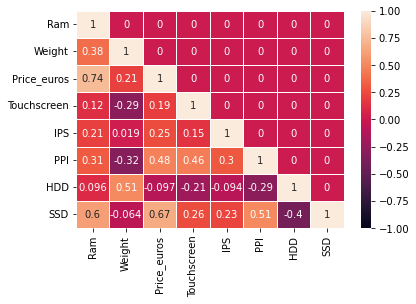

In [88]:
plotdata(data,nc,"c")

F:\Anaconda\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

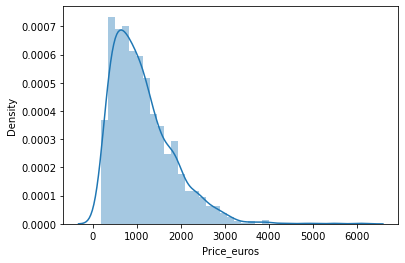

In [89]:
sns.distplot(data['Price_euros'])

F:\Anaconda\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

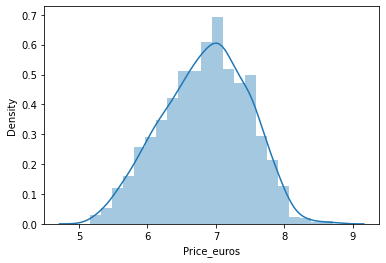

In [90]:

sns.distplot(np.log(data['Price_euros']))

In [91]:
data.head()

,Company,TypeName,Ram,Weight,Price_euros,Touchscreen,IPS,PPI,CPU brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [92]:
#data.to_csv('Cleaned_laptop_Price_Prediction', index=False)

In [93]:
data_old = data.copy()

In [94]:
#Using One hot coding change the data types of all the factor variable

from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
for i in fc:   
    data[i]= le.fit_transform(data[i])
    print(data)
fc

      Company            TypeName  Ram  Weight  Price_euros  Touchscreen  IPS  \
0           1           Ultrabook    8    1.37      1339.69            0    1   
1           1           Ultrabook    8    1.34       898.94            0    0   
2           7            Notebook    8    1.86       575.00            0    0   
3           1           Ultrabook   16    1.83      2537.45            0    1   
4           1           Ultrabook    8    1.37      1803.60            0    1   
...       ...                 ...  ...     ...          ...          ...  ...   
1298       10  2 in 1 Convertible    4    1.80       638.00            1    1   
1299       10  2 in 1 Convertible   16    1.30      1499.00            1    1   
1300       10            Notebook    2    1.50       229.00            0    0   
1301        7            Notebook    6    2.19       764.00            0    0   
1302        2            Notebook    4    2.20       369.00            0    0   

             PPI           

C:\Users\HP\AppData\Local\Temp/ipykernel_3816/1025521170.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]= le.fit_transform(data[i])
C:\Users\HP\AppData\Local\Temp/ipykernel_3816/1025521170.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]= le.fit_transform(data[i])
C:\Users\HP\AppData\Local\Temp/ipykernel_3816/1025521170.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

array(['Company', 'TypeName', 'CPU brand', 'Gpu brand', 'os'],
      dtype=object)

In [95]:
data

,Company,TypeName,Ram,Weight,Price_euros,Touchscreen,IPS,PPI,CPU brand,HDD,SSD,Gpu brand,os
0,1,4,8,1.37,1339.69,0,1,226.983005,2,0,128,1,0
1,1,4,8,1.34,898.94,0,0,127.677940,2,0,0,1,0
2,7,3,8,1.86,575.00,0,0,141.211998,2,0,256,1,1
3,1,4,16,1.83,2537.45,0,1,220.534624,3,0,512,0,0
4,1,4,8,1.37,1803.60,0,1,226.983005,2,0,256,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,4,1.80,638.00,1,1,157.350512,3,0,128,1,2
1299,10,0,16,1.30,1499.00,1,1,276.053530,3,0,512,1,2
1300,10,3,2,1.50,229.00,0,0,111.935204,4,0,0,1,2
1301,7,3,6,2.19,764.00,0,0,100.454670,3,1000,0,0,2


In [96]:
# split the dataset
trainx1,testx1,trainy1,testy1 = train_test_split(data.drop('Price_euros',1),np.log(data.Price_euros),test_size=0.25)

C:\Users\HP\AppData\Local\Temp/ipykernel_3816/454399016.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  trainx1,testx1,trainy1,testy1 = train_test_split(data.drop('Price_euros',1),np.log(data.Price_euros),test_size=0.25)


In [98]:
trainx1.shape,trainy1.shape

((976, 12), (976,))

In [99]:
testx1.shape,testy1.shape

((326, 12), (326,))

# OLS 

In [100]:
from sklearn.metrics import r2_score,mean_absolute_error

In [101]:
trainx1 = sm.add_constant(trainx1)
testx1 = sm.add_constant(testx1)

In [102]:
# Ordinary Least Square
m1 = sm.OLS(trainy1,trainx1).fit()

In [103]:
# summarise the model
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_euros   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     145.2
Date:                Thu, 13 Jan 2022   Prob (F-statistic):          2.26e-206
Time:                        14:21:44   Log-Likelihood:                -424.74
No. Observations:                 976   AIC:                             875.5
Df Residuals:                     963   BIC:                             939.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.1778      0.109     47.297      0.000       4.963       5.393
Company         0.0089      0.003      2.884      0.004       0.003       0.015
TypeName        0.0464      0.013      3.684      0.000       0.022       0.071
Ram             0.0472      0.004     12.461      0.000       0.040       0.055
Weight          0.0203      0.028      0.724      0.469      -0.035       0.075
Touchscreen     0.0396      0.048      0.827      0.409      -0.054       0.134
IPS             0.1039      0.029      3.544      0.000       0.046       0.161
PPI             0.0031      0.000      7.853      0.000       0.002       0.004
CPU brand      -0.0299      0.013     -2.225      0.026      -0.056      -0.004
HDD          5.099e-05   3.11e-05      1.639      0.102   -1.01e-05       0.000
SSD             0.0009      0.000      8.716      0.000       0.001       0.001
Gpu brand       0.1694      0.022      7.580      0.000       0.126       0.213
os              0.1357      0.030      4.507      0.000       0.077       0.195
==============================================================================
Omnibus:                       14.699   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.605
Skew:                          -0.232   Prob(JB):                     0.000248
Kurtosis:                       3.440   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
# predict 
p1 = m1.predict(testx1)
len(testy1)

326

In [107]:
# compare the Actual Y with the Predicted Y value
df = pd.DataFrame({'actual':testy1,'predicted':np.round(p1,0)})
df

,actual,predicted
750,6.163315,6.0
637,5.517453,6.0
694,6.880384,7.0
597,7.295735,7.0
285,6.490724,7.0
...,...,...
682,7.626083,7.0
885,7.494986,7.0
481,6.374343,6.0
858,6.475433,7.0


In [108]:
# Mean Squared Error
mse1 = mean_squared_error(testy1,p1)
print("Model 1 \n\tmse={}, \n\trmse={}".format(round(mse1,2),round((mse1),2)))
print('R2 score',r2_score(testy1,p1))
print('MAE',mean_absolute_error(testy1,p1))

Model 1 
	mse=0.14, 
	rmse=0.14
R2 score 0.6291672082396385
MAE 0.2955330270289601


# Feature Selection

In [109]:
def anovatest(x,y,data):
    model = ols('x~y',data=data).fit()
    anova = sm.stats.anova_lm(model,type=2)
    pvalue = anova['PR(>F)'][0]

    if pvalue < 0.05:
        msg = 'Reject H0: Feature {} is significant'.format(x.name)
    else:
        msg = 'FTR H0: Feature {} is insignificant'.format(x.name)
    
    return(msg)

In [110]:
data.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price_euros', 'Touchscreen',
       'IPS', 'PPI', 'CPU brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

In [111]:
#Perfor Annova test for feature selection

anovatest(data.Company, data.Price_euros,data)


'Reject H0: Feature Company is significant'

In [112]:
for i in data:
    print(anovatest(data[i], data.Price_euros,data))  # Allthe features are significants

Reject H0: Feature Company is significant
Reject H0: Feature TypeName is significant
Reject H0: Feature Ram is significant
Reject H0: Feature Weight is significant
Reject H0: Feature Price_euros is significant
Reject H0: Feature Touchscreen is significant
Reject H0: Feature IPS is significant
Reject H0: Feature PPI is significant
Reject H0: Feature CPU brand is significant
Reject H0: Feature HDD is significant
Reject H0: Feature SSD is significant
Reject H0: Feature Gpu brand is significant
Reject H0: Feature os is significant


# Decision Tree

In [113]:
import statsmodels.api as smapi
from sklearn.tree import DecisionTreeRegressor
from sklearn .metrics import mean_squared_error
# calculating different regression metrics

from sklearn.model_selection import GridSearchCV

In [114]:
m2_DT = DecisionTreeRegressor(random_state=0).fit(trainx1,trainy1)

In [115]:
p2_DT = m2_DT.predict(testx1)

In [116]:
print(p2_DT[0:5])

[6.89669433 5.433722   6.8554088  7.07834158 6.70808408]


In [117]:
#Store the predicgtion the data ferame for analysiis
df1 = pd.DataFrame({"actual_CCS":testy1,"predCCS_DT":p2_DT})

In [118]:
df1.head(10)

,actual_CCS,predCCS_DT
750,6.163315,6.896694
637,5.517453,5.433722
694,6.880384,6.855409
597,7.295735,7.078342
285,6.490724,6.708084
613,5.883322,6.095599
582,6.577861,7.034520
600,7.105786,7.295948
304,7.142827,7.411556
761,7.527794,7.575585


In [119]:
# Mean Squared Error
mse2 = mean_squared_error(testy1,p2_DT)

In [120]:
print("Model DT \n\tmse={}, \n\trmse={}".format(round(mse2,2),round(np.sqrt(mse2),2)))
print('R2 score',r2_score(testy1,p2_DT))
print('MAE',mean_absolute_error(testy1,p2_DT))

Model DT 
	mse=0.08, 
	rmse=0.29
R2 score 0.7844165270267522
MAE 0.2033544870324817


# Random Forest

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [122]:
m3_RF = RandomForestRegressor(n_estimators= 100).fit(trainx1,trainy1)

In [123]:
#Predicton the test data

p3_RF = m3_RF.predict(testx1)
p3_RF[0:5]

array([6.48424516, 5.49550558, 6.98852201, 7.00235701, 6.68462732])

In [124]:
#Store the predicgtion the data ferame for analysiis
df2 = pd.DataFrame({"actual":testy1,"pred_RF":p3_RF})

In [125]:
df2.head(10)

,actual,pred_RF
750,6.163315,6.484245
637,5.517453,5.495506
694,6.880384,6.988522
597,7.295735,7.002357
285,6.490724,6.684627
613,5.883322,6.082385
582,6.577861,6.601449
600,7.105786,6.960648
304,7.142827,7.097157
761,7.527794,7.596550


In [126]:
# Mean Squared Error
mse3 = mean_squared_error(testy1,p3_RF)

In [127]:
print("Model DT \n\tmse={}, \n\trmse={}".format(round(mse3,2),round(np.sqrt(mse3),2)))
print('R2 score',r2_score(testy1,p3_RF))
print('MAE',mean_absolute_error(testy1,p3_RF))

Model DT 
	mse=0.04, 
	rmse=0.21
R2 score 0.8858209584719063
MAE 0.15932202353171643


# KNN

In [128]:
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor

In [129]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(trainx1, trainy1)  #fit the model
    pred=model.predict(testx1) #make prediction on test set
    error = np.sqrt(mean_squared_error(testy1,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.34108034431954026
RMSE value for k=  2 is: 0.31641997694385426
RMSE value for k=  3 is: 0.29465030061760833
RMSE value for k=  4 is: 0.30229821979647115
RMSE value for k=  5 is: 0.29866326000248716
RMSE value for k=  6 is: 0.29966954652199385
RMSE value for k=  7 is: 0.3060313320939743
RMSE value for k=  8 is: 0.310545254372759
RMSE value for k=  9 is: 0.31072222402952576
RMSE value for k=  10 is: 0.31219335242481655
RMSE value for k=  11 is: 0.31584670383657065
RMSE value for k=  12 is: 0.3222016267140705
RMSE value for k=  13 is: 0.3215983411386819
RMSE value for k=  14 is: 0.32359827408497066
RMSE value for k=  15 is: 0.32446930470564117
RMSE value for k=  16 is: 0.3252192394483691
RMSE value for k=  17 is: 0.3275375628650013
RMSE value for k=  18 is: 0.3291719941051236
RMSE value for k=  19 is: 0.33108632557761897
RMSE value for k=  20 is: 0.33169949247822383


<AxesSubplot:>

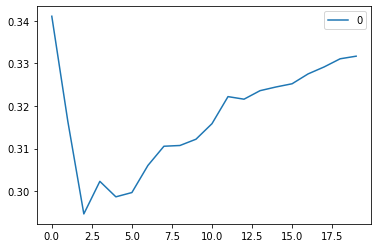

In [130]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot() #K = 2 will be the best value of K

In [131]:
m4_KNN = KNeighborsRegressor(n_neighbors=2)

In [132]:
m4_KNN.fit(trainx1,trainy1)

KNeighborsRegressor(n_neighbors=2)

In [133]:
#Predicton the test data

p4_KNN = m4_KNN.predict(testx1)
p4_KNN[0:5]

array([6.46369952, 5.433722  , 7.26131385, 6.91051565, 6.57229526])

In [134]:
#Store the predicgtion the data ferame for analysiis
df3 = pd.DataFrame({"actual":testy1,"pred_RF":p4_KNN})

In [135]:
df3.head(10)

,actual,pred_RF
750,6.163315,6.463700
637,5.517453,5.433722
694,6.880384,7.261314
597,7.295735,6.910516
285,6.490724,6.572295
613,5.883322,6.119485
582,6.577861,6.684304
600,7.105786,6.891975
304,7.142827,7.203769
761,7.527794,7.439351


In [136]:
# Mean Squared Error
mse4 = mean_squared_error(testy1,p4_KNN)

In [137]:
print("Model DT \n\tmse={}, \n\trmse={}".format(round(mse4,2),round(np.sqrt(mse4),2)))
print('R2 score',r2_score(testy1,p4_KNN))
print('MAE',mean_absolute_error(testy1,p4_KNN))

Model DT 
	mse=0.1, 
	rmse=0.32
R2 score 0.7349377210497879
MAE 0.23554649796062135


# SVR

In [138]:

from sklearn import svm

In [139]:
# build the SVR model using the best parameters
m5_SVR = svm.SVR(kernel='rbf',C=10000,epsilon=0.1).fit(trainx1,trainy1)

In [140]:
def Pred(model,testx,testy):
    pred = model.predict(testx)
    
    # mse and rmse
    mse = mean_squared_error(testy,pred)
    print("Model Error\n\tMSE={},\n\tRMSE={}".format(mse,np.sqrt(mse)))
    
    return(pred)

In [141]:
p5_SVR = m5_SVR.predict(testx1)
p5_SVR[0:5]

array([6.51573057, 5.47441733, 7.19836458, 7.06580017, 6.83613749])

In [142]:
#Store the predicgtion the data ferame for analysiis
df4 = pd.DataFrame({"actual":testy1,"pred_RF":p5_SVR})

In [143]:
df4.head(10)

,actual,pred_RF
750,6.163315,6.515731
637,5.517453,5.474417
694,6.880384,7.198365
597,7.295735,7.065800
285,6.490724,6.836137
613,5.883322,5.926243
582,6.577861,6.485825
600,7.105786,7.011330
304,7.142827,7.160737
761,7.527794,7.746200


In [144]:
# Mean Squared Error
mse5 = mean_squared_error(testy1,p5_SVR)

In [145]:
print("Model DT \n\tmse={}, \n\trmse={}".format(round(mse5,2),round(np.sqrt(mse5),2)))
print('R2 score',r2_score(testy1,p5_SVR))
print('MAE',mean_absolute_error(testy1,p5_SVR))

Model DT 
	mse=0.1, 
	rmse=0.32
R2 score 0.7224896213331483
MAE 0.23856370039868818


# ADAboost

In [146]:
from sklearn.ensemble import AdaBoostRegressor

In [147]:
# build the ADABoost regressor model using DecisionTree regressor
m6_ADA= AdaBoostRegressor(DecisionTreeRegressor(criterion="mse", max_depth=6,
                                             min_samples_split=3, 
                                             min_samples_leaf=5)).fit(trainx1,trainy1)


In [148]:
# predict
p6_ADA = m6_ADA.predict(testx1)
p6_ADA[0:5]

array([6.44453591, 5.61927243, 7.07501801, 7.06099259, 6.88169971])

In [149]:
data.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price_euros', 'Touchscreen',
       'IPS', 'PPI', 'CPU brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

In [150]:
 #Store the predicgtion the data ferame for analysiis
df5 = pd.DataFrame({"actual":testy1,"pred_RF":p6_ADA})

In [151]:
df5.head(10)

,actual,pred_RF
750,6.163315,6.444536
637,5.517453,5.619272
694,6.880384,7.075018
597,7.295735,7.060993
285,6.490724,6.881700
613,5.883322,6.167551
582,6.577861,6.633484
600,7.105786,7.074173
304,7.142827,7.005681
761,7.527794,7.542601


In [152]:
# Mean Squared Error
mse6 = mean_squared_error(testy1,p6_ADA)

In [153]:
print("Model DT \n\tmse={}, \n\trmse={}".format(round(mse6,2),round(np.sqrt(mse6),2)))
print('R2 score',r2_score(testy1,p6_ADA))
print('MAE',mean_absolute_error(testy1,p6_ADA))

Model DT 
	mse=0.05, 
	rmse=0.23
R2 score 0.8646955051631057
MAE 0.17965926840145632
